# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
import random
import time

# Przydatne funkcje 

In [586]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='orange')
    vis.show()

In [587]:
def draw_line(points_left, points_right, points_mid, importance):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    for i in range (3):
        if importance[i]==0 and len(points_left)!=0:
            vis.add_point(points_left, s=30, color=['green'])
        if importance[i]==1 and len(points_right)!=0:
            vis.add_point(points_right, s=30, color=['orange'])
        if importance[i]==2 and len(points_mid)!=0:
            vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [588]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

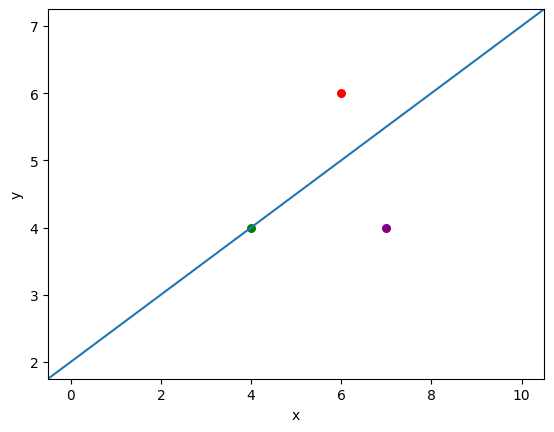

In [589]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [590]:
def generate_uniform_points(left, right, n = 10 ** 5):
    random.seed()
    points = []
    diff = right-left
    for i in range(n):
        x = random.random()*diff+left
        y = random.random()*diff+left
        points.append((x, y))
    return points
    

    
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    #raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [591]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

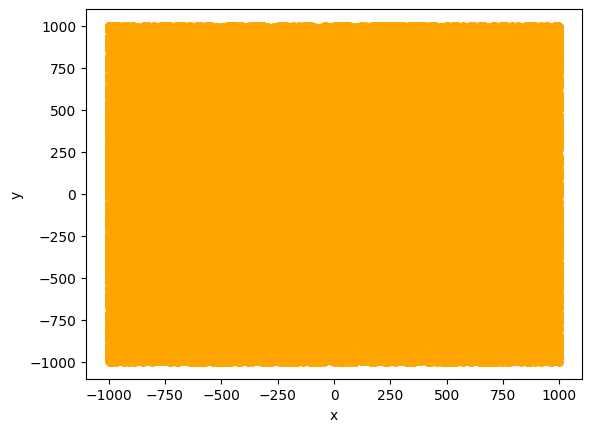

In [592]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [593]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

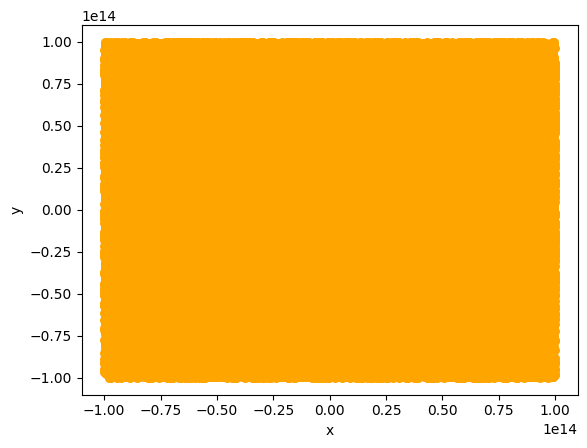

In [594]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [595]:
def generate_circle_points(O, R, n = 1000):
    points=[]
    step = 1/n
    for i in range (n):
        t = step * i
        x = R*np.cos(t*np.pi*2)+O[0]
        y = R*np.sin(t*np.pi*2)+O[1]
        points.append((x,y))
    return points

    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [596]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

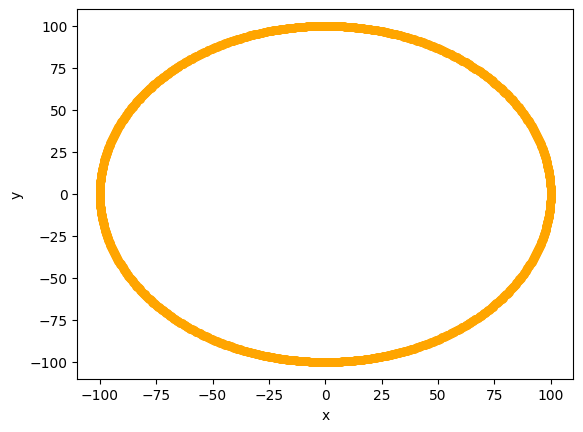

In [597]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [598]:
def generate_collinear_points(a, b, n=1000):
    random.seed()
    points=[]
    wsp=(b[1]-a[1])/(b[0]-a[0])
    for i in range(n):
        x = random.random()*2000-1000
        y = wsp*(x-a[0])+a[1]
        points.append((x, y))
    return points

    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [599]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

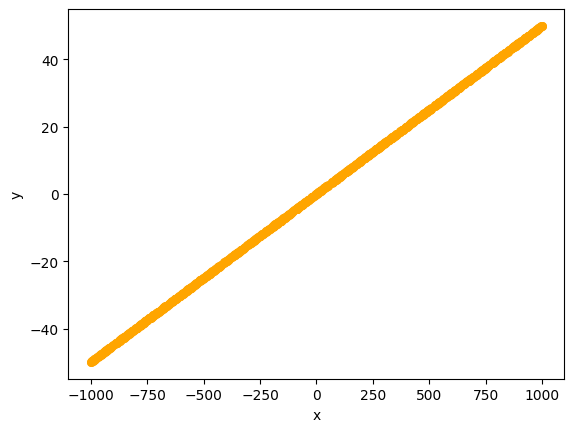

In [600]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [601]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.188s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [602]:
def mat_det_3x3(a, b, c):
    return (c[1]-b[1])*(b[0]-a[0])-(c[0]-b[0])*(b[1]-a[1])
    
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [603]:
def mat_det_3x3_lib(a, b, c):
    arr = np.array([[a[0],a[1],1], [b[0]-a[0],b[1]-a[1],0], [c[0]-b[0],c[1]-b[1],0]])
    return np.linalg.det(arr)
   
    
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    raise Exception("Unimplemented")

Uzupełnij funkcje ```mat_det_2x2```

In [604]:
def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [605]:
def mat_det_2x2_lib(a, b, c):
    arr = np.array([[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]])
    return np.linalg.det(arr)
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    raise Exception("Unimplemented")

Przetestujmy napisane powyżej funkcje.

In [606]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [607]:
def categorize_points(points, a, b, mat_det_func, eps):
    left=[]
    right=[]
    on_line=[]
    for i in range (len(points)):
        position=mat_det_func(a,b,points[i])
        if abs(position)<eps:
            on_line.append(points[i])
        elif position<0:
            right.append(points[i])
        else:
            left.append(points[i])
    return left, right, on_line
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    raise Exception("Unimplemented")

In [608]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [609]:
classified_points_a_left,classified_points_a_right,classified_points_a_mid = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

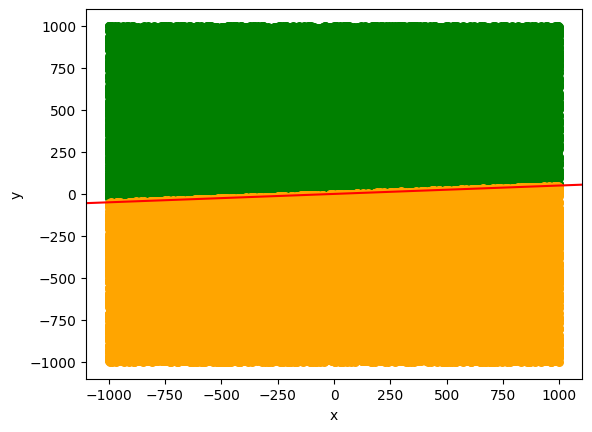

In [610]:
draw_line(classified_points_a_left, classified_points_a_right, classified_points_a_mid, [0,1,2])

In [611]:
classified_points_b_left,classified_points_b_right,classified_points_b_mid = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

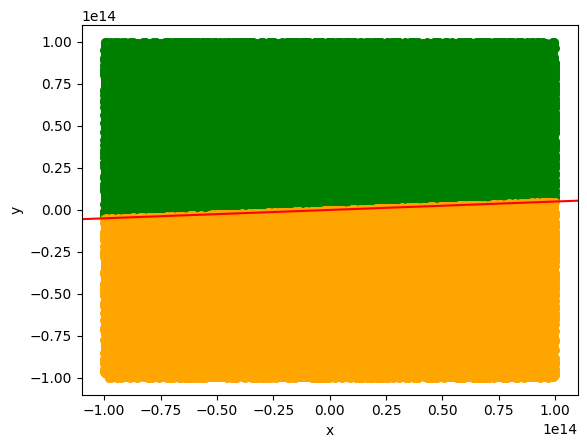

In [612]:
draw_line(classified_points_b_left, classified_points_b_right, classified_points_b_mid, [0,1,2])

In [613]:
classified_points_c_left,classified_points_c_right,classified_points_c_mid = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

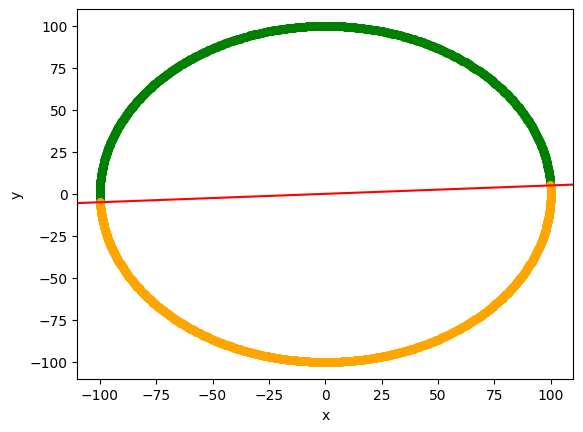

In [614]:
draw_line(classified_points_c_left, classified_points_c_right, classified_points_c_mid, [0,1,2])

In [615]:
classified_points_d_left,classified_points_d_right,classified_points_d_mid = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

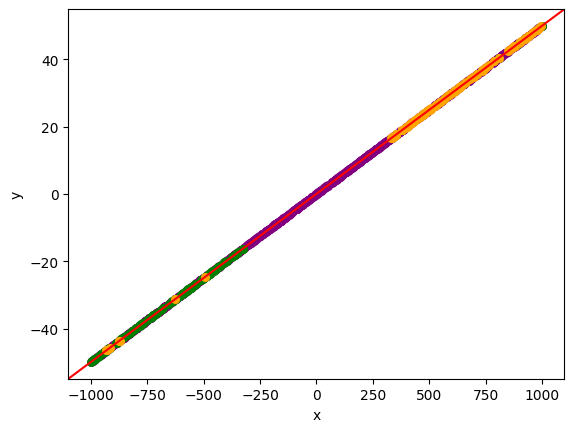

In [616]:
draw_line(classified_points_d_left, classified_points_d_right, classified_points_d_mid, [2,0,1])

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [617]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [618]:
def GeneratePoints(nr):
    if nr==0:
       points = generate_uniform_points(-1000, 1000, 10000)
    if nr==1:
        points = generate_uniform_points(-1e14, 1e14, 10000)
    if nr==2:
        points = generate_circle_points((0,0), 100, 10000)
    if nr==3:
        points = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 10000)
    return points


a = (-1.0, 0.0)
b = (1.0, 0.1)
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
eps_str = ["1e-6", "1e-8", "1e-10", "1e-12", "1e-14"]
for nr in range (4):
    points = GeneratePoints(nr)
    data = [[0 for _ in range (12)] for _ in range (len(eps))]
    data_time = [[0 for _ in range (12)] for _ in range (len(eps))]
    for i in range (len(eps)):
        start_time = time.time()
        left_3x3,right_3x3,on_line_3x3 = categorize_points(points, a, b, mat_det_3x3, eps[i])
        end_time = time.time()
        time_3x3 = end_time - start_time

        start_time = time.time()
        left_3x3lib,right_3x3lib,on_line_3x3lib = categorize_points(points, a, b, mat_det_3x3_lib, eps[i])
        end_time = time.time()
        time_3x3lib = end_time - start_time

        start_time = time.time()
        left_2x2,right_2x2,on_line_2x2 = categorize_points(points, a, b, mat_det_2x2, eps[i])
        end_time = time.time()
        time_2x2 = end_time - start_time

        start_time = time.time()
        left_2x2lib,right_2x2lib,on_line_2x2lib = categorize_points(points, a, b, mat_det_2x2_lib, eps[i])
        end_time = time.time()
        time_2x2lib = end_time - start_time
    
        data[i] = [len(left_3x3), len(on_line_3x3), len(right_3x3), len(left_3x3lib), len(on_line_3x3lib), len(right_3x3lib), len(left_2x2), len(on_line_2x2), len(right_2x2), len(left_2x2lib), len(on_line_2x2lib), len(right_2x2lib)]
        data_time[i] = [time_3x3, time_3x3lib, time_2x2, time_2x2lib]

    table = pd.DataFrame(data, index=pd.Index(eps_str, name = "Epsilon"), columns = pd.MultiIndex.from_product([["Wyznacznik 3x3 bez NumPy", "Wyznacznik 3x3 z NumPy", "Wyznacznik 2x2 bez NumPy", "Wyznacznik 2x2 z NumPy"], ["na lewo", "na lini", "na prawo"]]))
    table_time = pd.DataFrame(data_time, index=pd.Index(eps_str, name = "Epsilon"), columns = ["Wyznacznik 3x3 bez NumPy", "Wyznacznik 3x3 z NumPy", "Wyznacznik 2x2 bez NumPy", "Wyznacznik 2x2 z NumPy"])
    display (table)
    display (table_time)











Wyznacznik 3x3 bez NumPy                  Wyznacznik 3x3 z NumPy  \
                         na lewo na lini na prawo                na lewo   
Epsilon                                                                    
1e-6                        4968       0     5032                   4968   
1e-8                        4968       0     5032                   4968   
1e-10                       4968       0     5032                   4968   
1e-12                       4968       0     5032                   4968   
1e-14                       4968       0     5032                   4968   

                         Wyznacznik 2x2 bez NumPy                   \
        na lini na prawo                  na lewo na lini na prawo   
Epsilon                                                              
1e-6          0     5032                     4968       0     5032   
1e-8          0     5032                     4968       0     5032   
1e-10         0     5032                     4968       0     5032   
1e-12         0     5032                     4968       0     5032   
1e-14         0     5032                     4968       0     5032   

        Wyznacznik 2x2 z NumPy                   
                       na lewo na lini na prawo  
Epsilon                                          
1e-6                      4968       0     5032  
1e-8                      4968       0     5032  
1e-10                     4968       0     5032  
1e-12                     4968       0     5032  
1e-14                     4968       0     5032

,Wyznacznik 3x3 bez NumPy,Wyznacznik 3x3 z NumPy,Wyznacznik 2x2 bez NumPy,Wyznacznik 2x2 z NumPy
Epsilon,,,,
1e-6,0.004996,0.092795,0.006059,0.078677
1e-8,0.007001,0.086714,0.004080,0.091045
1e-10,0.005001,0.095815,0.005001,0.081316
1e-12,0.005068,0.088770,0.004000,0.088414
1e-14,0.006110,0.093770,0.006154,0.085737


Wyznacznik 3x3 bez NumPy                  Wyznacznik 3x3 z NumPy  \
                         na lewo na lini na prawo                na lewo   
Epsilon                                                                    
1e-6                        4920       0     5080                   4920   
1e-8                        4920       0     5080                   4920   
1e-10                       4920       0     5080                   4920   
1e-12                       4920       0     5080                   4920   
1e-14                       4920       0     5080                   4920   

                         Wyznacznik 2x2 bez NumPy                   \
        na lini na prawo                  na lewo na lini na prawo   
Epsilon                                                              
1e-6          0     5080                     4920       0     5080   
1e-8          0     5080                     4920       0     5080   
1e-10         0     5080                     4920       0     5080   
1e-12         0     5080                     4920       0     5080   
1e-14         0     5080                     4920       0     5080   

        Wyznacznik 2x2 z NumPy                   
                       na lewo na lini na prawo  
Epsilon                                          
1e-6                      4920       0     5080  
1e-8                      4920       0     5080  
1e-10                     4920       0     5080  
1e-12                     4920       0     5080  
1e-14                     4920       0     5080

,Wyznacznik 3x3 bez NumPy,Wyznacznik 3x3 z NumPy,Wyznacznik 2x2 bez NumPy,Wyznacznik 2x2 z NumPy
Epsilon,,,,
1e-6,0.005466,0.104026,0.006118,0.080717
1e-8,0.004999,0.098415,0.004994,0.074639
1e-10,0.005105,0.114617,0.007125,0.083194
1e-12,0.004000,0.107938,0.005465,0.075616
1e-14,0.007065,0.110816,0.008145,0.074644


Wyznacznik 3x3 bez NumPy                  Wyznacznik 3x3 z NumPy  \
                         na lewo na lini na prawo                na lewo   
Epsilon                                                                    
1e-6                        4998       0     5002                   4998   
1e-8                        4998       0     5002                   4998   
1e-10                       4998       0     5002                   4998   
1e-12                       4998       0     5002                   4998   
1e-14                       4998       0     5002                   4998   

                         Wyznacznik 2x2 bez NumPy                   \
        na lini na prawo                  na lewo na lini na prawo   
Epsilon                                                              
1e-6          0     5002                     4998       0     5002   
1e-8          0     5002                     4998       0     5002   
1e-10         0     5002                     4998       0     5002   
1e-12         0     5002                     4998       0     5002   
1e-14         0     5002                     4998       0     5002   

        Wyznacznik 2x2 z NumPy                   
                       na lewo na lini na prawo  
Epsilon                                          
1e-6                      4998       0     5002  
1e-8                      4998       0     5002  
1e-10                     4998       0     5002  
1e-12                     4998       0     5002  
1e-14                     4998       0     5002

,Wyznacznik 3x3 bez NumPy,Wyznacznik 3x3 z NumPy,Wyznacznik 2x2 bez NumPy,Wyznacznik 2x2 z NumPy
Epsilon,,,,
1e-6,0.012162,0.100038,0.013127,0.080864
1e-8,0.010336,0.112429,0.010137,0.083548
1e-10,0.008057,0.102530,0.012226,0.080626
1e-12,0.010080,0.089035,0.010063,0.082013
1e-14,0.009082,0.097589,0.014197,0.078596


Wyznacznik 3x3 bez NumPy                  Wyznacznik 3x3 z NumPy  \
                         na lewo na lini na prawo                na lewo   
Epsilon                                                                    
1e-6                           0   10000        0                      0   
1e-8                           0   10000        0                      0   
1e-10                          0   10000        0                      0   
1e-12                          0   10000        0                      0   
1e-14                          0    9270      730                    247   

                         Wyznacznik 2x2 bez NumPy                   \
        na lini na prawo                  na lewo na lini na prawo   
Epsilon                                                              
1e-6      10000        0                        0   10000        0   
1e-8      10000        0                        0   10000        0   
1e-10     10000        0                        0   10000        0   
1e-12     10000        0                      808    8378      814   
1e-14      8829      924                     1403    7145     1452   

        Wyznacznik 2x2 z NumPy                   
                       na lewo na lini na prawo  
Epsilon                                          
1e-6                         0   10000        0  
1e-8                         0   10000        0  
1e-10                        0   10000        0  
1e-12                     1075    7829     1096  
1e-14                     1522    6970     1508

,Wyznacznik 3x3 bez NumPy,Wyznacznik 3x3 z NumPy,Wyznacznik 2x2 bez NumPy,Wyznacznik 2x2 z NumPy
Epsilon,,,,
1e-6,0.006117,0.099055,0.006122,0.090172
1e-8,0.006997,0.088977,0.005089,0.077633
1e-10,0.004084,0.094178,0.005121,0.092205
1e-12,0.007135,0.093820,0.005083,0.075470
1e-14,0.004049,0.089662,0.003996,0.079503


1e-06


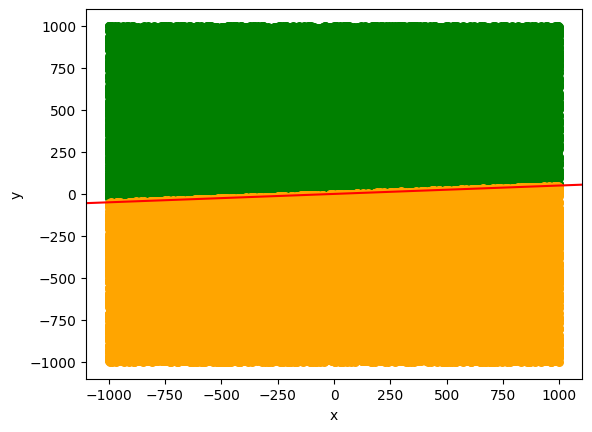

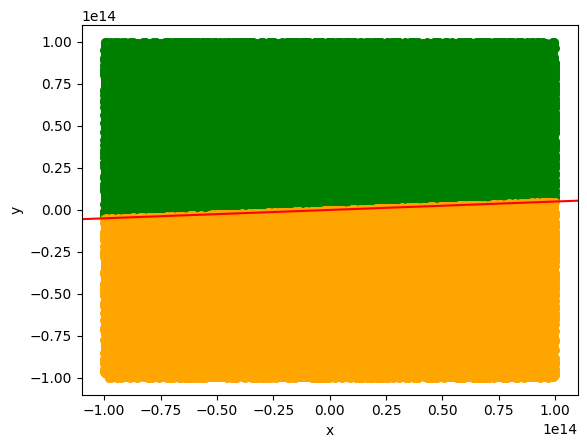

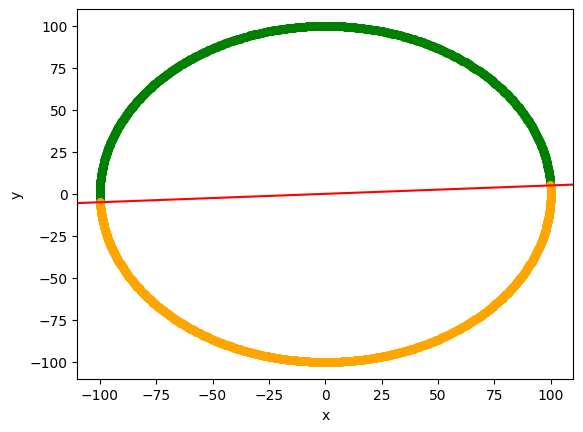

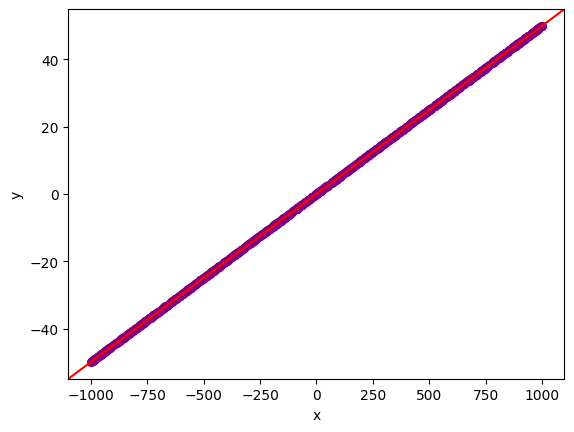

In [619]:
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
i=0
print (eps[i])
classified_points_a_left,classified_points_a_right,classified_points_a_mid = categorize_points(points_a, a, b, mat_det_3x3, eps[i])
draw_line(classified_points_a_left, classified_points_a_right, classified_points_a_mid, [0,1,2])
classified_points_b_left,classified_points_b_right,classified_points_b_mid = categorize_points(points_b, a, b, mat_det_3x3_lib, eps[i])
draw_line(classified_points_b_left, classified_points_b_right, classified_points_b_mid, [0,1,2])
classified_points_c_left,classified_points_c_right,classified_points_c_mid = categorize_points(points_c, a, b, mat_det_2x2, eps[i])
draw_line(classified_points_c_left, classified_points_c_right, classified_points_c_mid, [0,1,2])
classified_points_d_left,classified_points_d_right,classified_points_d_mid = categorize_points(points_d, a, b, mat_det_2x2_lib, eps[i])
draw_line(classified_points_d_left, classified_points_d_right, classified_points_d_mid, [2,0,1])

1e-14


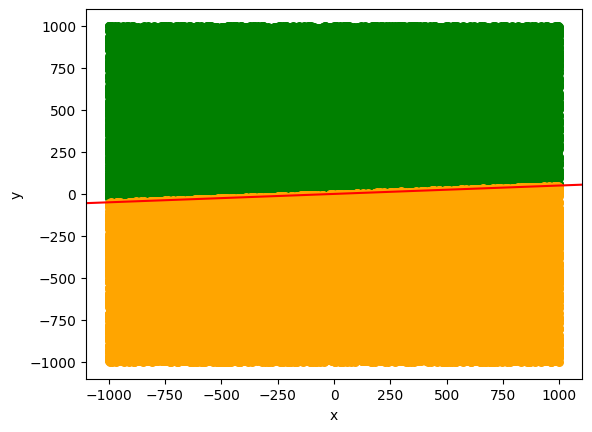

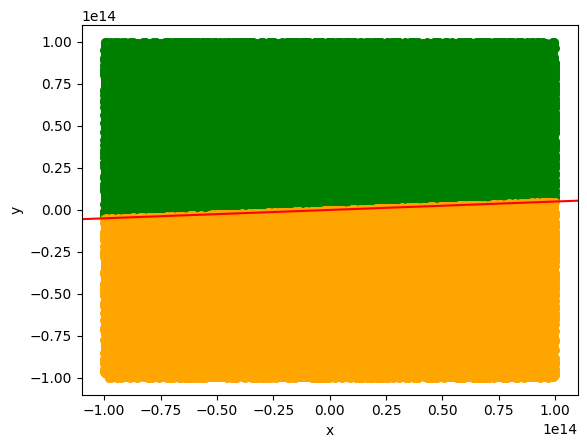

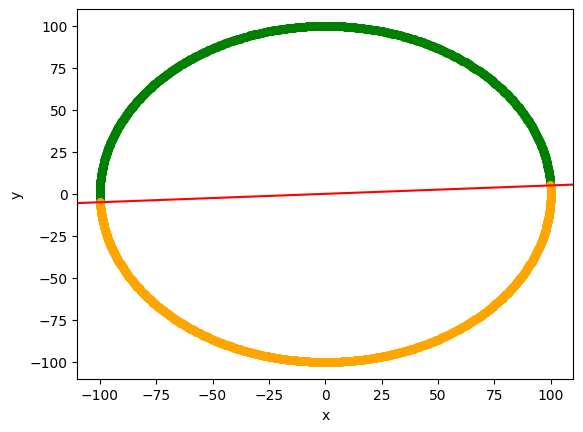

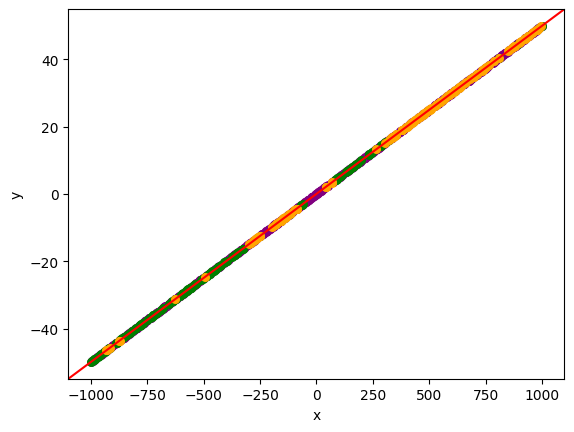

In [620]:
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
i=4
print (eps[i])
classified_points_a_left,classified_points_a_right,classified_points_a_mid = categorize_points(points_a, a, b, mat_det_3x3, eps[i])
draw_line(classified_points_a_left, classified_points_a_right, classified_points_a_mid, [0,1,2])
classified_points_b_left,classified_points_b_right,classified_points_b_mid = categorize_points(points_b, a, b, mat_det_3x3_lib, eps[i])
draw_line(classified_points_b_left, classified_points_b_right, classified_points_b_mid, [0,1,2])
classified_points_c_left,classified_points_c_right,classified_points_c_mid = categorize_points(points_c, a, b, mat_det_2x2, eps[i])
draw_line(classified_points_c_left, classified_points_c_right, classified_points_c_mid, [0,1,2])
classified_points_d_left,classified_points_d_right,classified_points_d_mid = categorize_points(points_d, a, b, mat_det_2x2_lib, eps[i])
draw_line(classified_points_d_left, classified_points_d_right, classified_points_d_mid, [2,0,1])

In [621]:
def DifferentFloat (points1,mat_det_func,eps):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    diff_points=[]
    points2 = np.float32(points1)
    for i in range (len(points1)):
        position1=mat_det_func(a,b,points1[i])
        position2=mat_det_func(a,b,points2[i])
        if (abs(position1)<eps and abs(position2)>=eps) or (abs(position2)<eps and abs(position1)>=eps):
            diff_points.append(points[i])
    return diff_points

In [622]:
def DifferentEps (points,mat_det_func,eps1,eps2):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    diff_points=[]
    for i in range (len(points)):
        position=mat_det_func(a,b,points[i])
        if (abs(position)<eps1 and abs(position)>eps2) or (abs(position)<eps2 and abs(position)>eps1):
            diff_points.append(points[i])
    return diff_points
    
    

In [623]:
def DifferentFunc (points,eps):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    diff_points=[]

    for i in range (len(points)):
        position1=mat_det_3x3(a,b,points[i])
        position2=mat_det_3x3_lib(a,b,points[i])
        position3=mat_det_2x2(a,b,points[i])
        position4=mat_det_2x2_lib(a,b,points[i])

        to_add=False
        if abs(position1)<eps:
            on_line=True
        else:
            on_line=False
        if (abs(position2)<eps and on_line==False) or (abs(position2)>=eps and on_line==True):
            to_add=True
        if (abs(position3)<eps and on_line==False) or (abs(position3)>=eps and on_line==True):
            to_add=True
        if (abs(position4)<eps and on_line==False) or (abs(position4)>=eps and on_line==True):
            to_add=True
        
        if to_add==True:
            diff_points.append(points[i])

    return diff_points

In [624]:
def DifferentFunc2 (points,mat_det_func1,mat_det_func2,eps):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    diff_points=[]
    for i in range (len(points)):
        position1=mat_det_func1(a,b,points[i])
        position2=mat_det_func2(a,b,points[i])
        if (abs(position1)<eps and abs(position2)>=eps) or (abs(position2)<eps and abs(position1)>=eps):
            diff_points.append(points[i])
    return diff_points
        

In [625]:
def draw_line2(points):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points, s=30, color=['orange'])
    vis.show()

,1e-8,1e-10,1e-12,1e-14
Płaszczyzna 2000x2000,0,0,0,0
Płaszczyzna (2e14)x(2e14),0,0,0,0
Okręg,0,0,0,0
Prosta,0,0,237,312


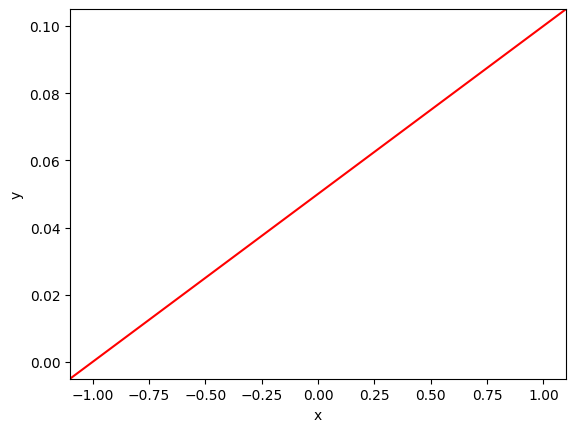

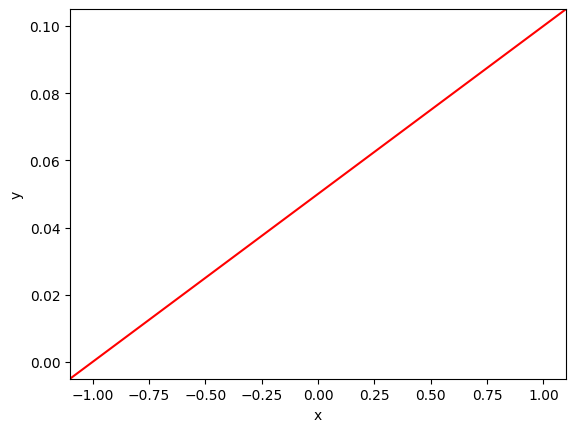

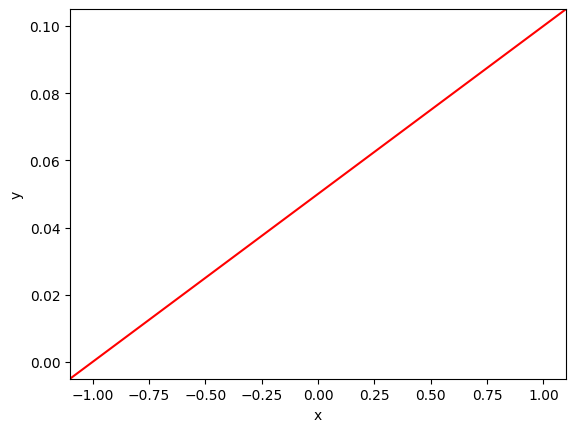

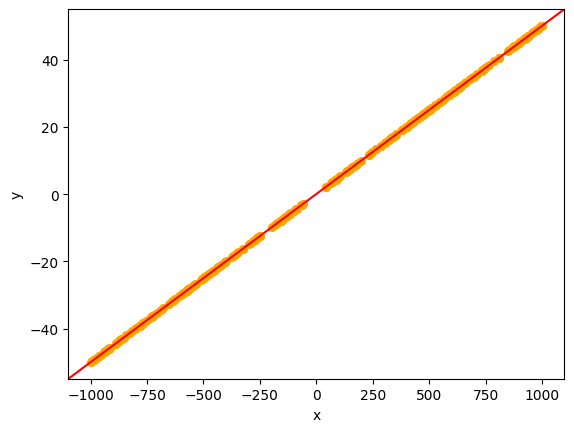

In [626]:
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
points=[[] for _ in range (4)]
data=[[] for _ in range (4)]

for i in range (1,5):
    points=points_a
    diff_points=DifferentEps (points,mat_det_3x3,1e-6,eps[i])
    data[0].append(len(diff_points))
    if i==4:
        draw_line2(diff_points)

for i in range (1,5):
    points=points_b
    diff_points=DifferentEps (points,mat_det_3x3_lib,1e-6,eps[i])
    data[1].append(len(diff_points))
    if i==4:
        draw_line2(diff_points)

for i in range (1,5):
    points=points_c
    diff_points=DifferentEps (points,mat_det_2x2,1e-6,eps[i])
    data[2].append(len(diff_points))
    if i==4:
        draw_line2(diff_points)

for i in range (1,5):
    points=points_d
    diff_points=DifferentEps (points,mat_det_2x2_lib,1e-6,eps[i])
    data[3].append(len(diff_points))
    if i==4:
        draw_line2(diff_points)



table = pd.DataFrame(data, index=["Płaszczyzna 2000x2000","Płaszczyzna (2e14)x(2e14)","Okręg","Prosta"], columns = ["1e-8", "1e-10", "1e-12", "1e-14"])
display (table)

,Wyznacznik 3x3 z NumPy,Wyznacznik 2x2 bez NumPy,Wyznacznik 2x2 z NumPy
Płaszczyzna 2000x2000,0,0,0
Płaszczyzna (2e14)x(2e14),0,0,0
Okręg,0,0,0
Prosta,131,323,344


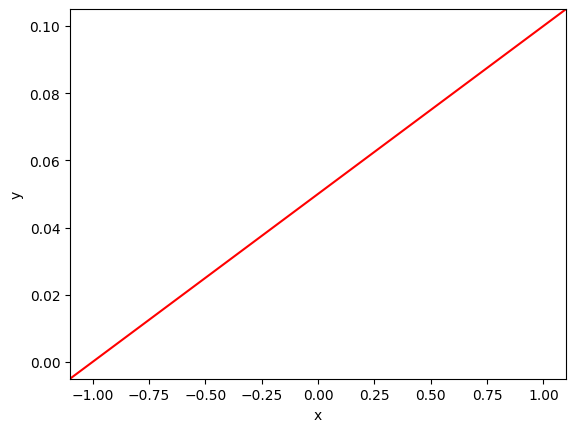

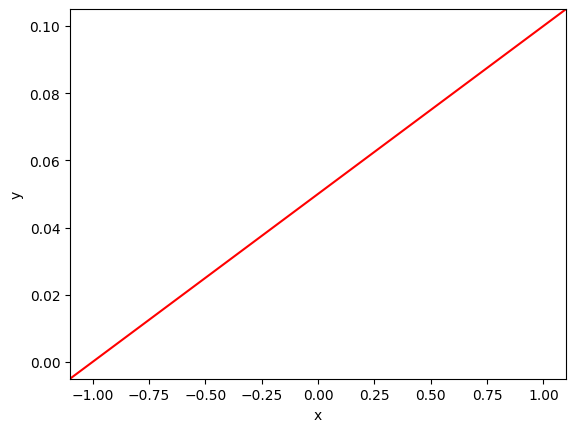

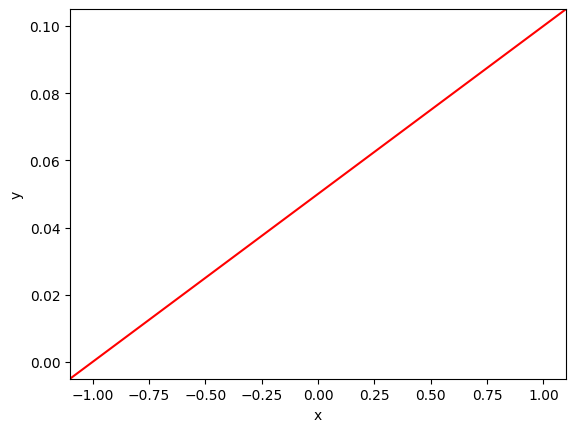

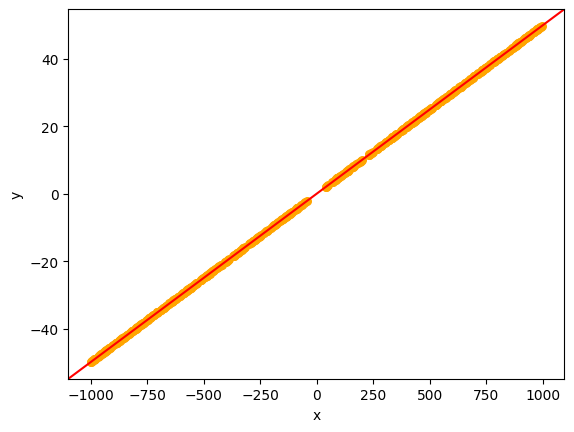

In [627]:

def ToPoints_b():
    #Wstępna selekcja dla points_b
    points=[]
    for i in range (len(points_b)):
        check_y=wsp*(points_b[i][0]-a[0])+a[1]
        if abs(check_y-points_b[i][1])<1:
            points.append(points_b)
    return points


def PickPoints(nr):
    if nr==0:
        return points_a
    if nr==1:
        return ToPoints_b()
    if nr==2:
        return points_c
    if nr==3:
        return points_d

eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
points=[[] for _ in range (4)]
data=[[] for _ in range (4)]
wsp=(b[1]-a[1])/(b[0]-a[0])

points=points_a
diff_points=DifferentFunc(points,1e-14)
draw_line2(diff_points)

points=[]
check_y=wsp*(points_b[i][0]-a[0])+a[1]
for i in range (len(points_b)):
    check_y=wsp*(points_b[i][0]-a[0])+a[1]
    if abs(check_y-points_b[i][1])<1:
        points.append(points_b)
    

diff_points=DifferentFunc(points,1e-14)
draw_line2(diff_points)

points=points_c
diff_points=DifferentFunc(points,1e-14)
draw_line2(diff_points)

points=points_d
diff_points=DifferentFunc(points,1e-14)
draw_line2(diff_points)



for i in range (4):
    points=PickPoints(i)
    diff_points=DifferentFunc2(points,mat_det_3x3,mat_det_3x3_lib,1e-14)
    data[i].append(len(diff_points))

for i in range (4):
    points=PickPoints(i)
    diff_points=DifferentFunc2(points,mat_det_3x3,mat_det_2x2,1e-14)
    data[i].append(len(diff_points))

for i in range (4):
    points=PickPoints(i)
    diff_points=DifferentFunc2(points,mat_det_3x3,mat_det_2x2_lib,1e-14)
    data[i].append(len(diff_points))



table = pd.DataFrame(data, index=["Płaszczyzna 2000x2000","Płaszczyzna (2e14)x(2e14)","Okręg","Prosta"], columns=["Wyznacznik 3x3 z NumPy","Wyznacznik 2x2 bez NumPy","Wyznacznik 2x2 z NumPy"])
display (table)

,Ilość
Płaszczyzna 2000x2000,0
Płaszczyzna (2e14)x(2e14),0
Okręg,0
Prosta,637


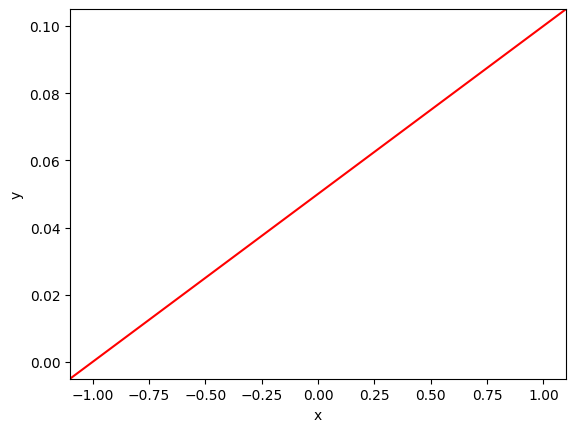

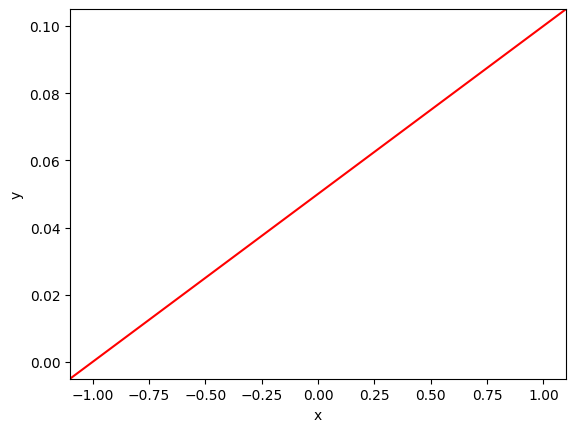

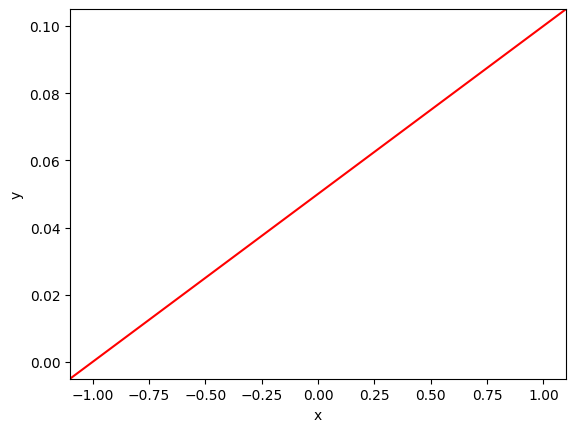

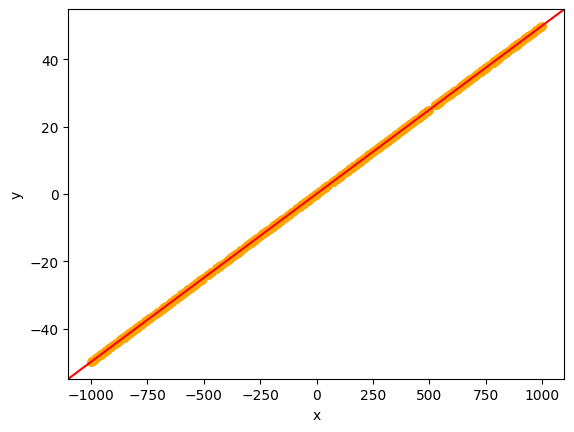

In [628]:
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
points=[[] for _ in range (4)]
data=[]


points=points_a
diff_points=DifferentFloat (points,mat_det_3x3,1e-14)
data.append(len(diff_points))
draw_line2(diff_points)



points=points_b
diff_points=DifferentFloat (points,mat_det_3x3_lib,1e-14)
data.append(len(diff_points))
draw_line2(diff_points)



points=points_c
diff_points=DifferentFloat (points,mat_det_2x2,1e-14)
data.append(len(diff_points))
draw_line2(diff_points)



points=points_d
diff_points=DifferentFloat (points,mat_det_2x2_lib,1e-14)
data.append(len(diff_points))
draw_line2(diff_points)




table = pd.DataFrame(data, index=["Płaszczyzna 2000x2000","Płaszczyzna (2e14)x(2e14)","Okręg","Prosta"], columns = ["Ilość"])
display (table)

In [629]:
def GeneratePoints(nr):
    if nr==0:
       points = generate_uniform_points(-1000, 1000, 10000)
    if nr==1:
        points = generate_uniform_points(-1e14, 1e14, 10000)
    if nr==2:
        points = generate_circle_points((0,0), 100, 10000)
    if nr==3:
        points = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 10000)
    return points


a = (-1.0, 0.0)
b = (1.0, 0.1)
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
eps_str = ["1e-6", "1e-8", "1e-10", "1e-12", "1e-14"]
data = [[] for _ in range (len(eps))]
for nr in range (4):
    points = GeneratePoints(nr)
    for i in range (len(eps)):
        left,right,on_line = categorize_points(points, a, b, mat_det_3x3, eps[i])
        data[i].append(len(left))
        data[i].append(len(on_line))
        data[i].append(len(right))
    
table = pd.DataFrame(data, index=pd.Index(eps_str, name = "Epsilon"), columns = pd.MultiIndex.from_product([["Płaszczyzna 2000x2000", "Płaszczyzna (2e14)x(2e14)", "Okręg", "Prosta"], ["na lewo", "na lini", "na prawo"]]))
display (table)

Płaszczyzna 2000x2000                  Płaszczyzna (2e14)x(2e14)  \
                      na lewo na lini na prawo                   na lewo   
Epsilon                                                                    
1e-6                     5030       0     4970                      5049   
1e-8                     5030       0     4970                      5049   
1e-10                    5030       0     4970                      5049   
1e-12                    5030       0     4970                      5049   
1e-14                    5030       0     4970                      5049   

                           Okręg                   Prosta                   
        na lini na prawo na lewo na lini na prawo na lewo na lini na prawo  
Epsilon                                                                     
1e-6          0     4951    4998       0     5002       0   10000        0  
1e-8          0     4951    4998       0     5002       0   10000        0  
1e-10         0     4951    4998       0     5002       0   10000        0  
1e-12         0     4951    4998       0     5002       0   10000        0  
1e-14         0     4951    4998       0     5002       0    9302      698

In [630]:
def GeneratePoints(nr):
    if nr==0:
       points = generate_uniform_points(-1000, 1000, 10000)
    if nr==1:
        points = generate_uniform_points(-1e14, 1e14, 10000)
    if nr==2:
        points = generate_circle_points((0,0), 100, 10000)
    if nr==3:
        points = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 10000)
    return points


a = (-1.0, 0.0)
b = (1.0, 0.1)
eps = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
eps_str = ["1e-6", "1e-8", "1e-10", "1e-12", "1e-14"]
data = [[] for _ in range (len(eps))]
for nr in range (4):
    points = GeneratePoints(nr)
    points = np.float32(points)
    for i in range (len(eps)):
        left,right,on_line = categorize_points(points, a, b, mat_det_3x3, eps[i])
        data[i].append(len(left))
        data[i].append(len(on_line))
        data[i].append(len(right))
    
table = pd.DataFrame(data, index=pd.Index(eps_str, name = "Epsilon"), columns = pd.MultiIndex.from_product([["Płaszczyzna 2000x2000", "Płaszczyzna (2e14)x(2e14)", "Okręg", "Prosta"], ["na lewo", "na lini", "na prawo"]]))
display (table)

Płaszczyzna 2000x2000                  Płaszczyzna (2e14)x(2e14)  \
                      na lewo na lini na prawo                   na lewo   
Epsilon                                                                    
1e-6                     5063       0     4937                      4977   
1e-8                     5063       0     4937                      4977   
1e-10                    5063       0     4937                      4977   
1e-12                    5063       0     4937                      4977   
1e-14                    5063       0     4937                      4977   

                           Okręg                   Prosta                   
        na lini na prawo na lewo na lini na prawo na lewo na lini na prawo  
Epsilon                                                                     
1e-6          0     5023    4998       0     5002    2443    4965     2592  
1e-8          0     5023    4998       0     5002    4005    1842     4153  
1e-10         0     5023    4998       0     5002    4023    1814     4163  
1e-12         0     5023    4998       0     5002    4023    1814     4163  
1e-14         0     5023    4998       0     5002    4023    1626     4351